# First import all the required libraries.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.datasets import load_boston

In [2]:
boston = load_boston()

/home/gaio/anaconda3/envs/testenviroment/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np

        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the Cal

# Quick Analysis of Data Set

In [3]:
print("Shape for Data is", boston.data.shape) 
print("Shape for Target is", boston.target.shape) 
print("Names of header :\n", boston.feature_names)
print("Dataset description :\n", boston.DESCR)

Shape for Data is (506, 13)
Shape for Target is (506,)
Names of header :
 ['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']
Dataset description :
 .. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted di

# Create a Pandas Data Frame from this data set

In [4]:
df = pd.DataFrame(boston.data)

In [5]:
# provide  header names and  our target column

In [6]:
df.columns = boston.feature_names
df['MEDV'] = boston.target
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [7]:
# EDA

In [8]:
df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


# Histogram to visualize the distribution and relationship of independent variables with our target variable

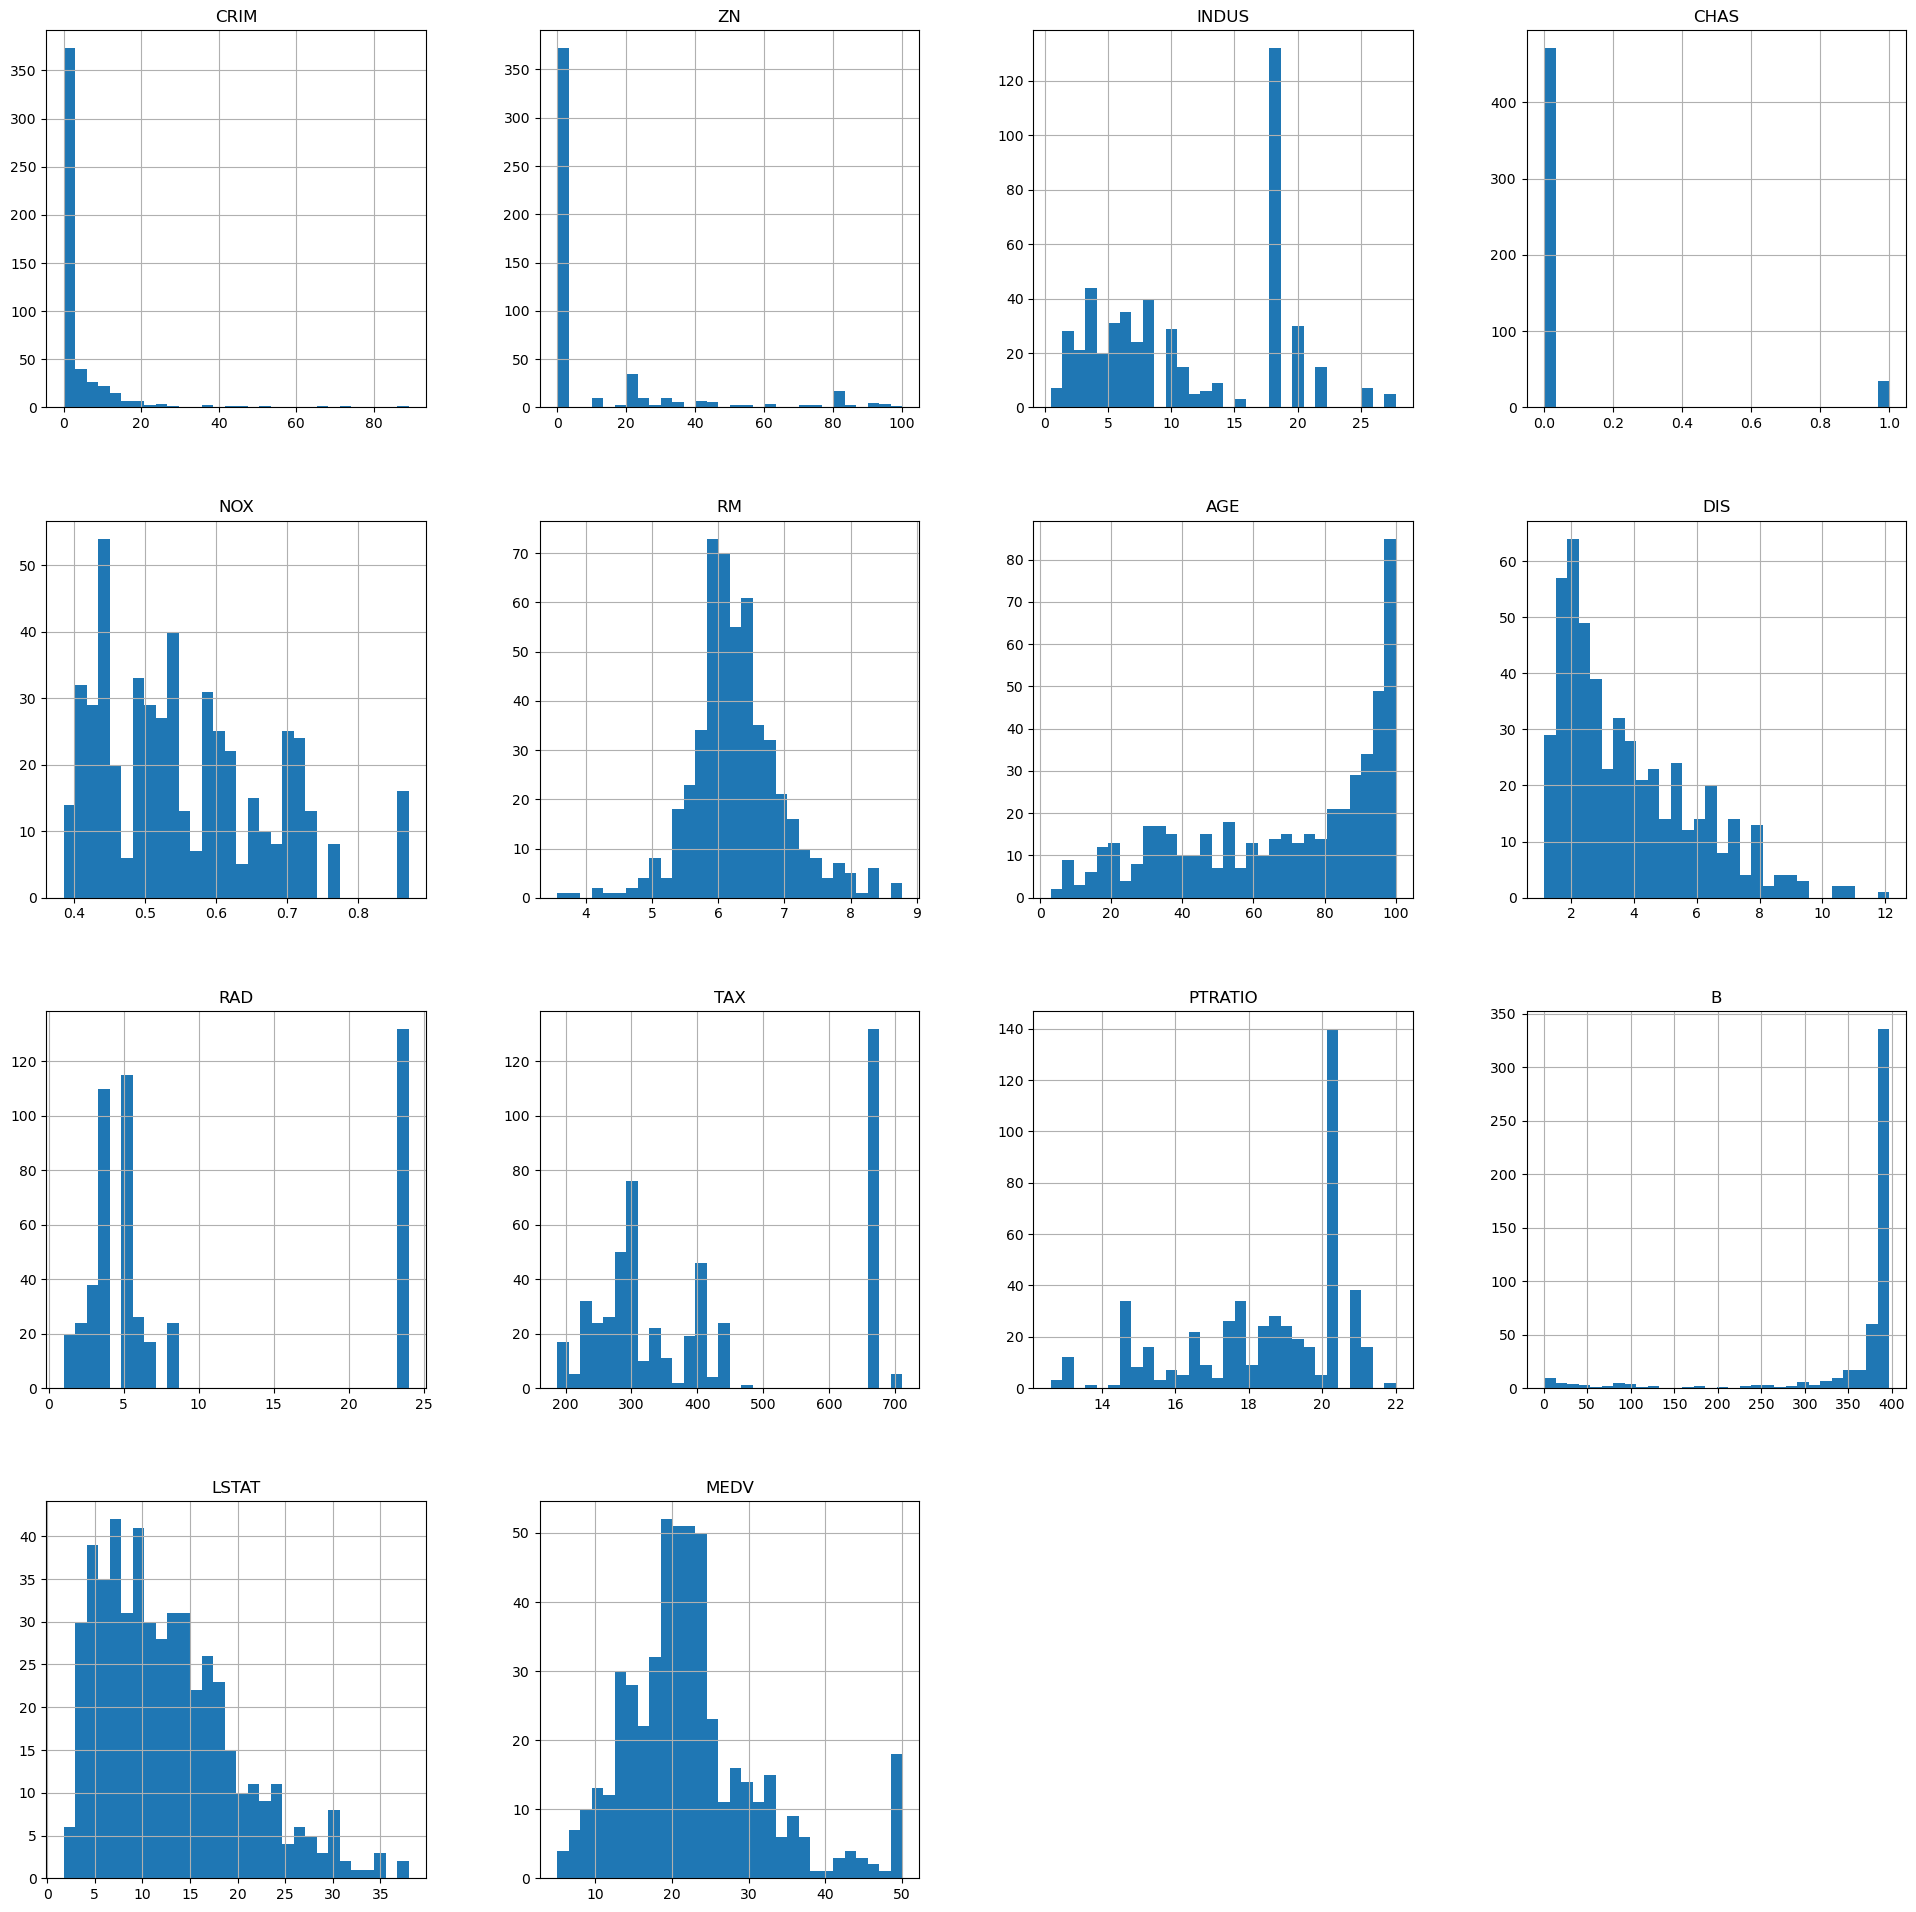

In [9]:
 df.hist(bins=30, figsize=(24,24))
plt.show()

# Using the regression plot from seaborn library to find the relationship between between independent variables and target variable (MEDV)

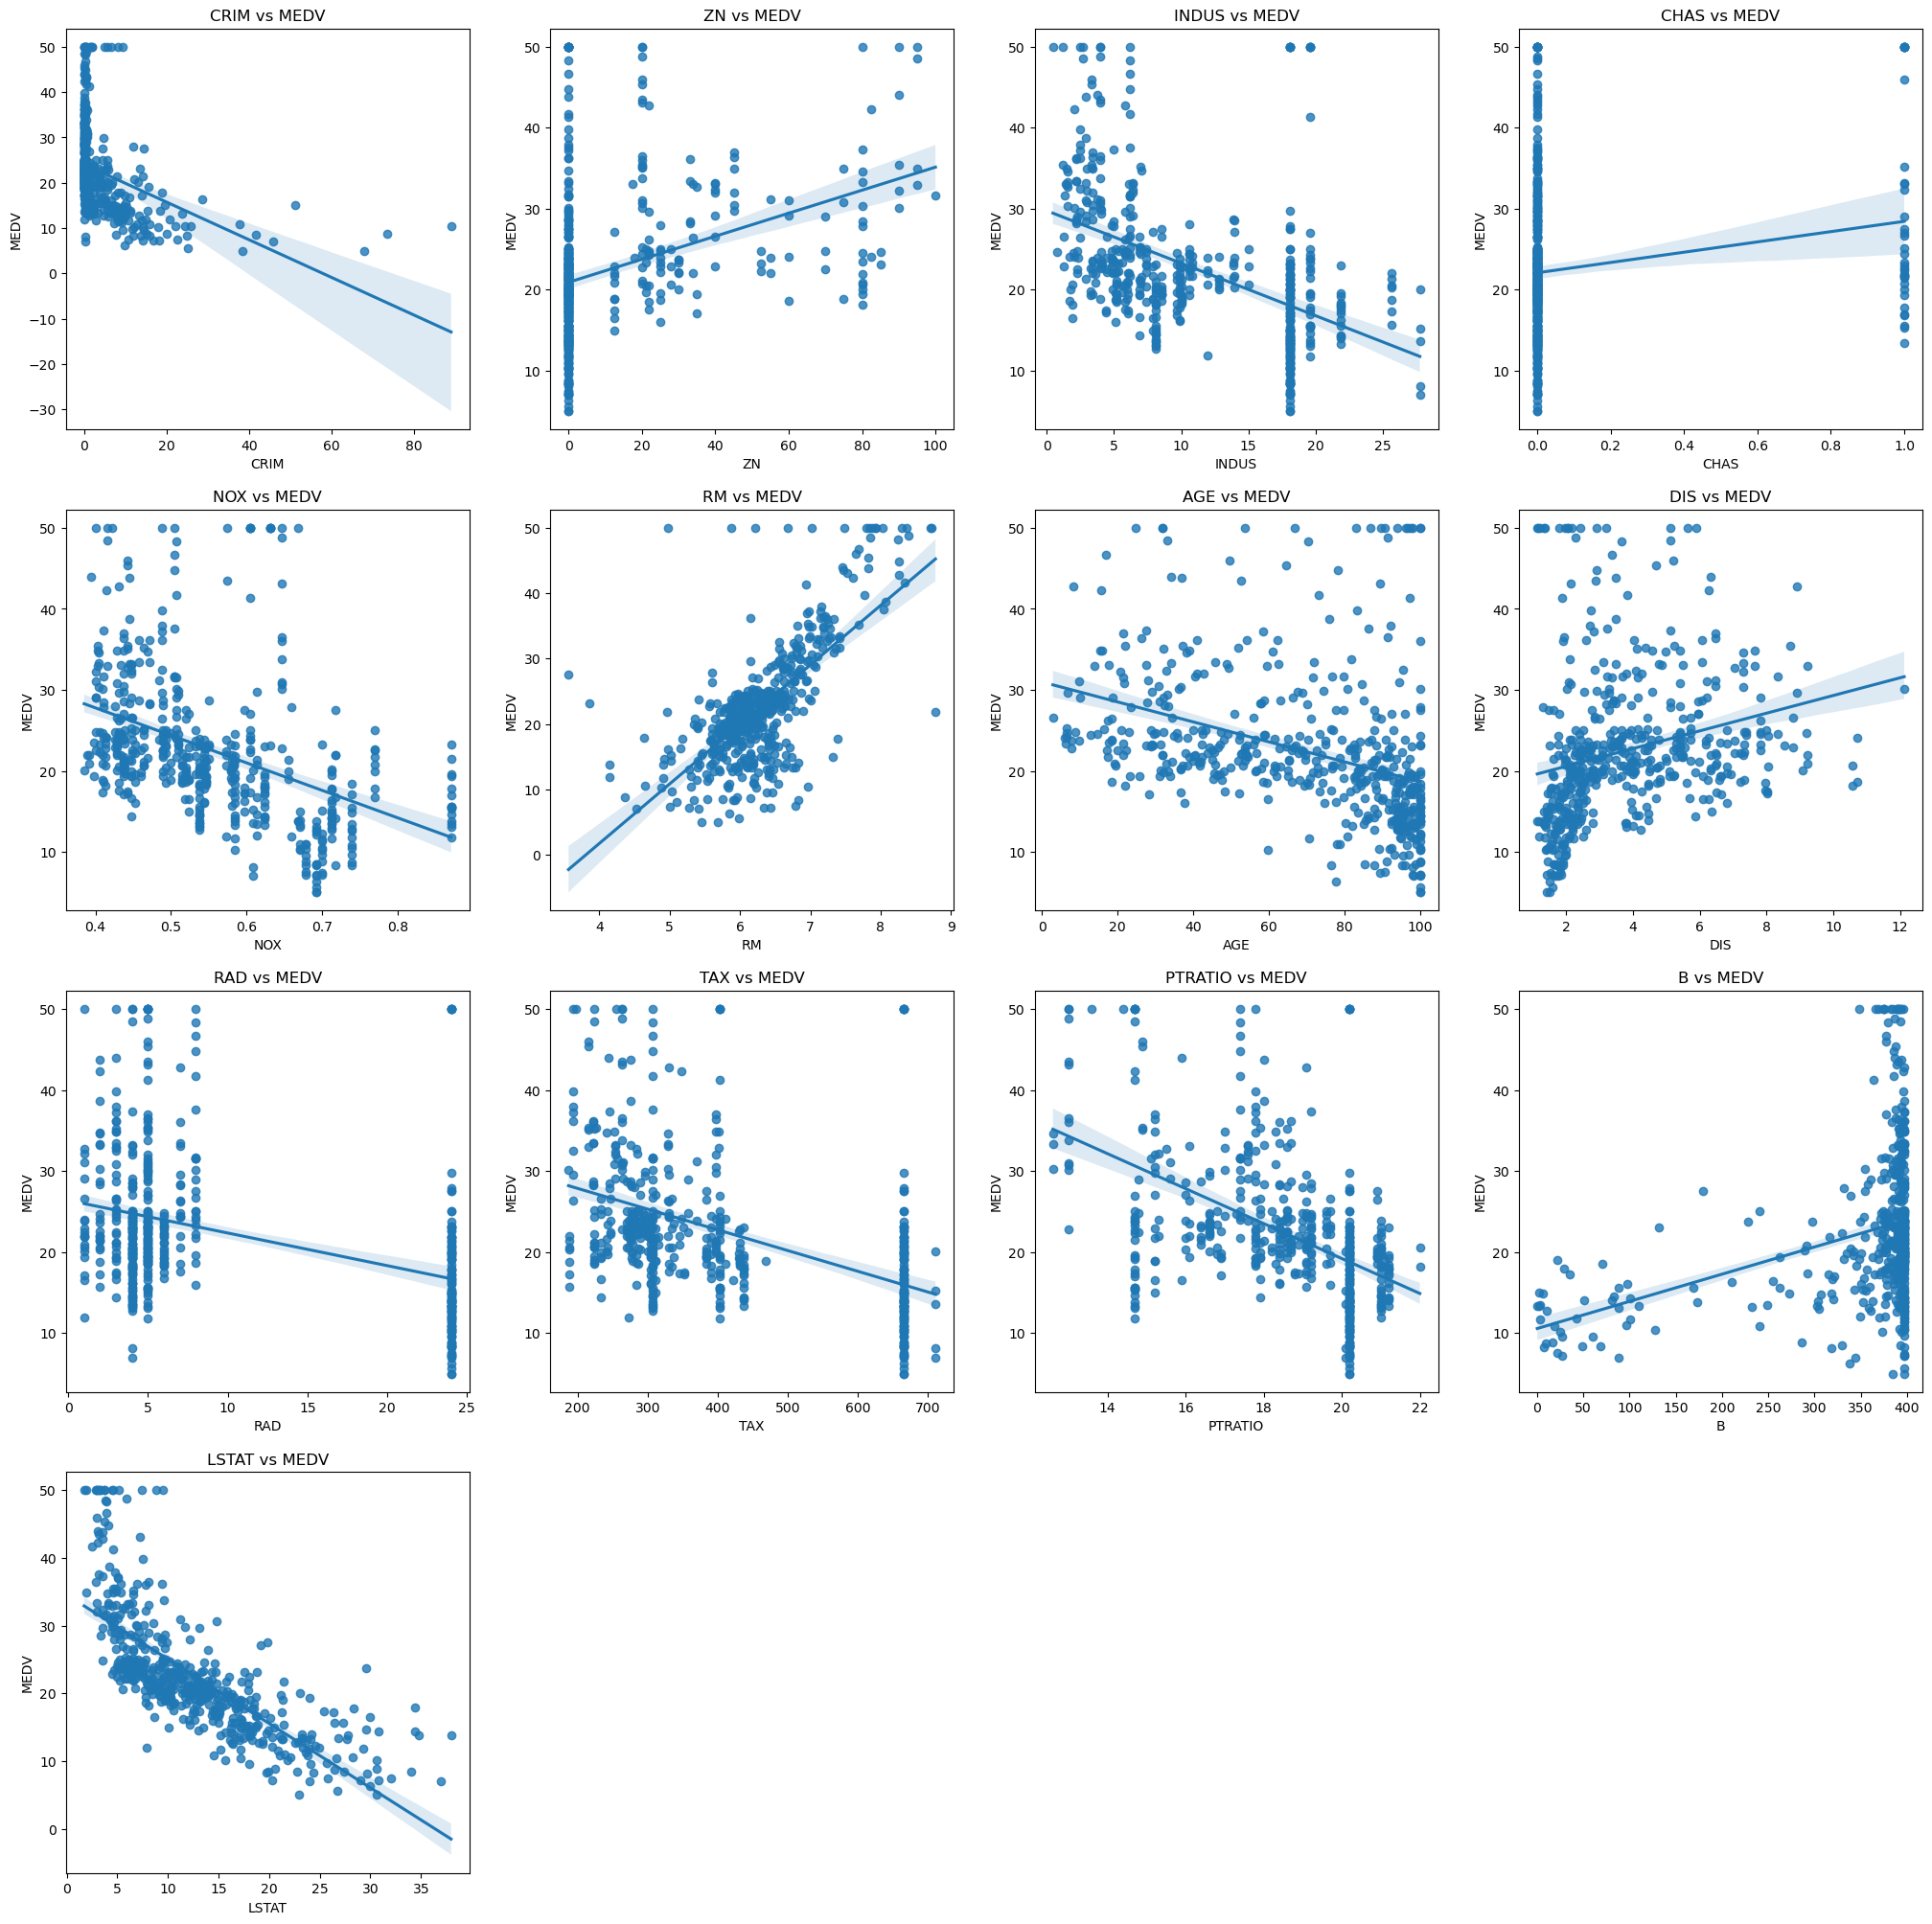

In [10]:
plt.figure(figsize=(25, 25))
for i, col in enumerate(boston.feature_names):
    plt.subplot(4, 4 , i+1)
    sns.regplot(x=col, y='MEDV', data=df)
    plt.title("%s vs MEDV" %(col))

# find the Pearson Corelation of all the features with an heatmap

#### 1:1 - Positively correlated -1 - Negatively correlated. 0 - Not correlated.

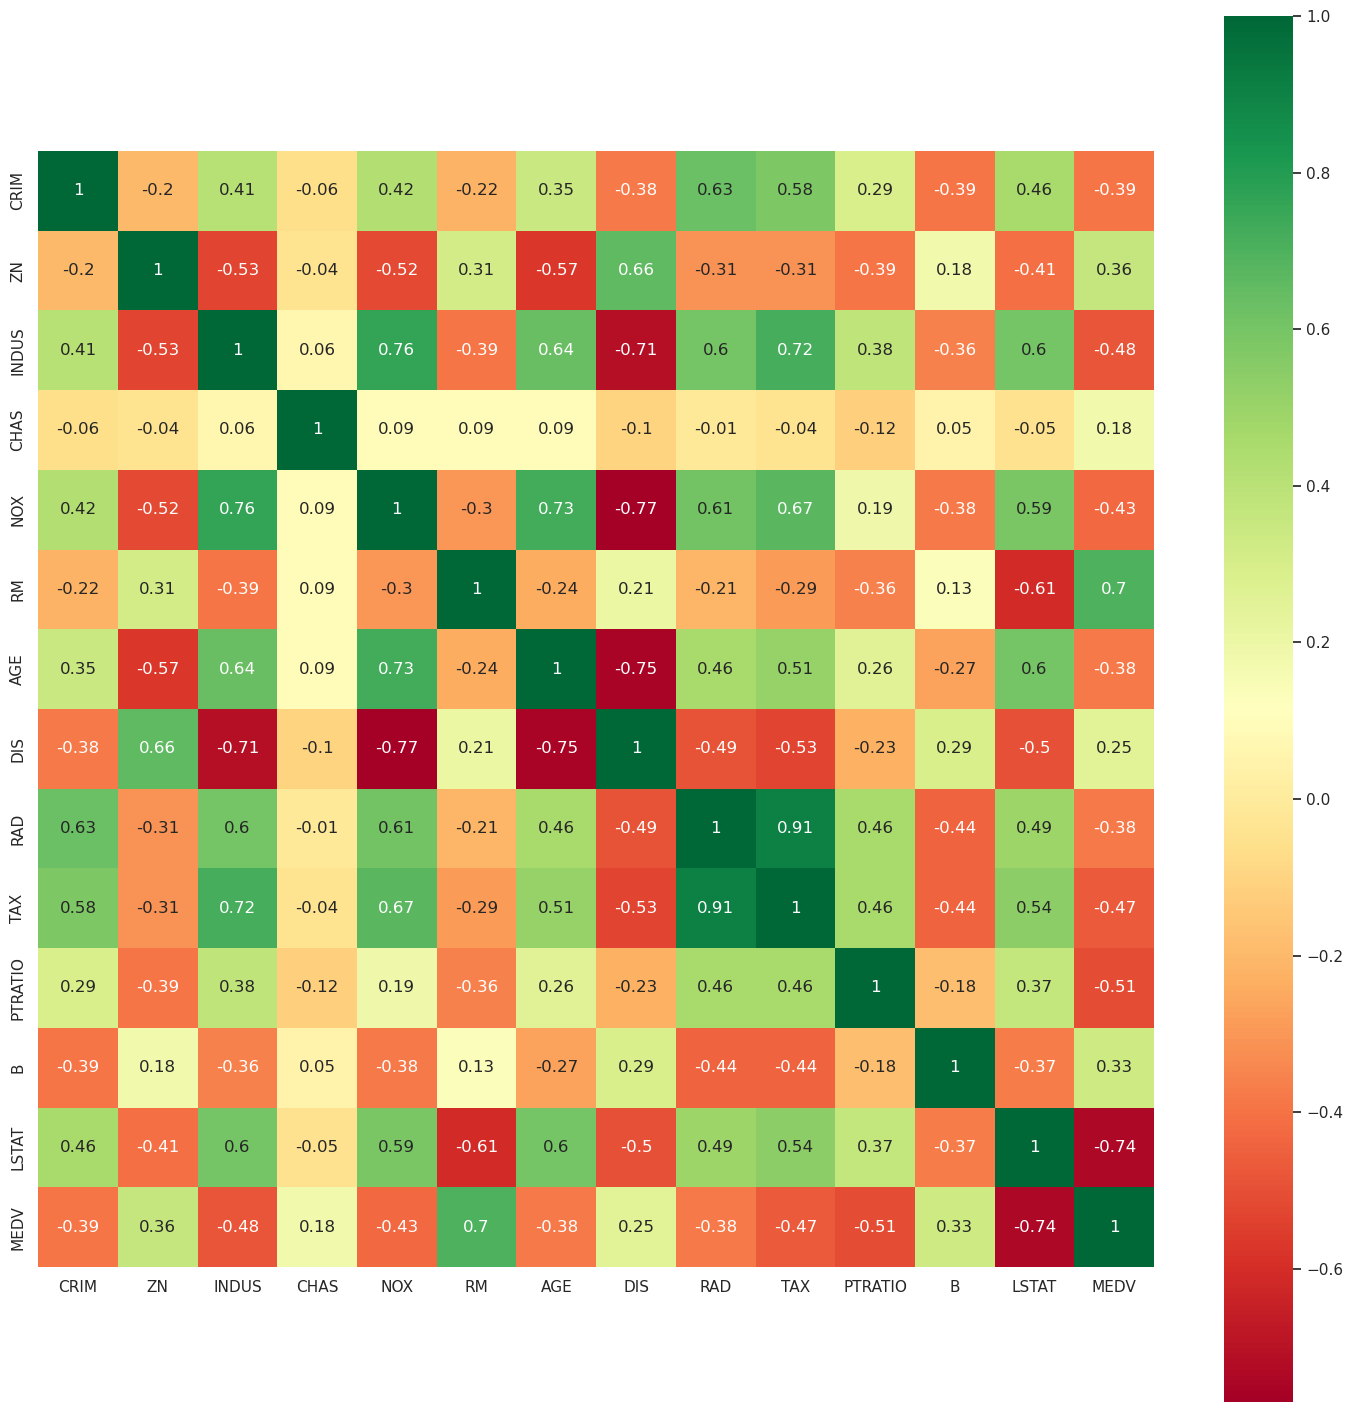

In [11]:
sns.set(rc={'figure.figsize':(18,18)})
sns.heatmap(df.corr().round(2), square=True, cmap='RdYlGn', annot=True)
plt.show()

In [12]:
pearson_coef1, p_value1 = stats.pearsonr(df['RM'],df['MEDV'] )
print('The Pearson correlation Coefficient for RM is:',pearson_coef1, 'with a P-Value of P = ', p_value1)


The Pearson correlation Coefficient for RM is: 0.6953599470715395 with a P-Value of P =  2.4872288710071593e-74


In [13]:
pearson_coef2, p_value2 = stats.pearsonr(df['LSTAT'], df['MEDV'])
print("The Pearson Correlation Coefficient for LSTAT is", pearson_coef2, " with a P-value of P = ", p_value2)

The Pearson Correlation Coefficient for LSTAT is -0.737662726174015  with a P-value of P =  5.081103394386392e-88


In [14]:
print("Is there strong evidence if corelation is signifcant for RM :- ", p_value1 < 0.001) 
print("Is there strong evidence if corelation is signifcant for LSTAT :- ", p_value2 < 0.001) 


Is there strong evidence if corelation is signifcant for RM :-  True
Is there strong evidence if corelation is signifcant for LSTAT :-  True


# Linear Model Creation

## Simple Linear Regression

In [15]:
from sklearn.linear_model import LinearRegression

lm1 = LinearRegression()
x1 = df[['RM']]
y1 = df[['MEDV']]

lm1.fit(x1,y1)

print('intercept for the model is', lm1.intercept_, ' and the scope is', lm1.coef_)

Yout1 = lm1.predict(x1)

print('Predicted Values:', Yout1[0:5])
print('Actual Values:', y1.values[0:5])

intercept for the model is [-34.67062078]  and the scope is [[9.10210898]]
Predicted Values: [[25.17574577]
 [23.77402099]
 [30.72803225]
 [29.02593787]
 [30.38215211]]
Actual Values: [[24. ]
 [21.6]
 [34.7]
 [33.4]
 [36.2]]


## Multiple Linear Regression

In [17]:
lm2 = LinearRegression()
X2 = df[['RM', 'LSTAT']]
y2=df[['MEDV']]

lm2.fit(x2,y2)

print("Intercept for the model is", lm2.intercept_, "and the scope is",lm2.coef_)

# Prediction
Yout2 = lm2.predict(X2)

# Actual and Predicted values (first five)
print("Predicted Values:",Yout2[0:5])
print("Actual Values:",y2.values[0:5])


Intercept for the model is [-1.35827281] and the scope is [[ 5.09478798 -0.64235833]]
Predicted Values: [[28.94101368]
 [25.48420566]
 [32.65907477]
 [32.40652   ]
 [31.63040699]]
Actual Values: [[24. ]
 [21.6]
 [34.7]
 [33.4]
 [36.2]]


In [19]:
# Seaborn library to be used for Residual Plot
plt.figure(figsize=(6,6))
sns.residplot(df['RM'],df['MEDV'])
plt.show()

TypeError: residplot() takes from 0 to 1 positional arguments but 2 were given

<Figure size 600x600 with 0 Axes>

In [ ]:
plt.figure(figsize=(6,6))
ax1 = sns.distplot(df['MEDV'], hist=False, color="r", label="Actual")
sns.distplot(Yout2, hist=False, color="b", label="Fitted", ax=ax1)